## Synthetic data numerical results (Figure 4 - Figure 6)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Sketch-experiments/function_approximation/synthetic

Mounted at /content/drive
/content/drive/MyDrive/Sketch-experiments/function_approximation/synthetic


In [2]:
## load the functions
%run -i framework.py
%run -i exp.py

In [3]:
objs = ['max', 'CES-2', 'square_root']
distributions = ["Exponential", "Pareto-1.5"] # toggle Pareto scale

# fixed parameters
n = 50
n_sample = 10000
n_sets = 10

### Function approximation accuracy versus parameter $\epsilon$ (Figure 5)

In [4]:
### Plotting utility for Figure 5
def box_plot_eps(df, distribution, is_log):
    fig, axes = plt.subplots(1, 3, figsize = (6.4*3, 4.8))
    flierprops = dict(marker='o', markeredgecolor='lightgrey', zorder=1)

    for i, obj in enumerate(objs):
      current = df[(df['distribution'] == distribution) & (df['obj'] == obj)]
      current.loc[:, 'c'] = np.round(current['c'], 4)

      # Get unique c values sorted
      c_vals = np.array(sorted(current['c'].unique()))
      data_by_c = [current.loc[current['c'] == c_val, 'ratio'] for c_val in c_vals]

      # Make sure log scale is set before computing widths
      if is_log == 1:
        axes[i].set_xscale('log')

      # Fixed width in axis fraction (e.g., 3% of total axis width)
      width_frac = 0.1

      # Convert that fraction into actual data widths at each c
      widths = []

      for c_val in c_vals:
        # centre in axis coords
        centre_disp = axes[i].transData.transform((c_val, 0))  # (pixels_x, pixels_y)
        left_disp = (centre_disp[0] - axes[i].get_window_extent().width * width_frac / 2, centre_disp[1])
        right_disp = (centre_disp[0] + axes[i].get_window_extent().width * width_frac / 2, centre_disp[1])

        # Convert back to data coords
        left_data = axes[i].transData.inverted().transform(left_disp)[0]
        right_data = axes[i].transData.inverted().transform(right_disp)[0]

        widths.append(right_data - left_data)

      # Draw boxplots with computed widths
      axes[i].boxplot(
        data_by_c,
        positions=c_vals,
        widths=widths,
        flierprops=flierprops,
        boxprops=dict(zorder=2),
        whiskerprops=dict(zorder=2),
        capprops=dict(zorder=2),
        medianprops=dict(zorder=3)
      )

      axes[i].grid()
      axes[i].set_title(obj, fontsize=16)
      axes[i].set_xlabel(r"$\epsilon \cdot k$", fontsize=16)
      axes[i].set_ylabel(r"$\hat{v}(S)\, /\, \hat{u}(S)$", fontsize=16)
      axes[i].set_xticks([1e-1, 1, 1e1])
      axes[i].set_xticklabels([1e-1, 1, 1e1])
      axes[i].set_ylim((0, 2))
      axes[i].set_xlim((1e-1-0.02, 1e1 + 2))


In [5]:
c = np.round(np.logspace(-1,0.96,10),4)
create_output()

for k in range(1,21):
    print(f"Now processing {k}") ## vary set size k
    set_items = get_sets(n, k, n_sets)
    eps = [e for e in c / k if e<1]
    for obj in objs:
        run_comparison(n, k, eps, n_sample, 'Exponential', obj, n_sets, set_items)
        # toggle distributions
        #run_comparison(n, k, eps, n_sample, 'Pareto-1.5', obj, n_sets, set_items)

Now processing 1


/content/drive/MyDrive/Sketch-experiments/function_approximation/synthetic/exp.py:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_row], ignore_index=True)


Now processing 2
Now processing 3
Now processing 4
Now processing 5
Now processing 6
Now processing 7
Now processing 8
Now processing 9
Now processing 10
Now processing 11
Now processing 12
Now processing 13
Now processing 14
Now processing 15
Now processing 16
Now processing 17
Now processing 18
Now processing 19
Now processing 20


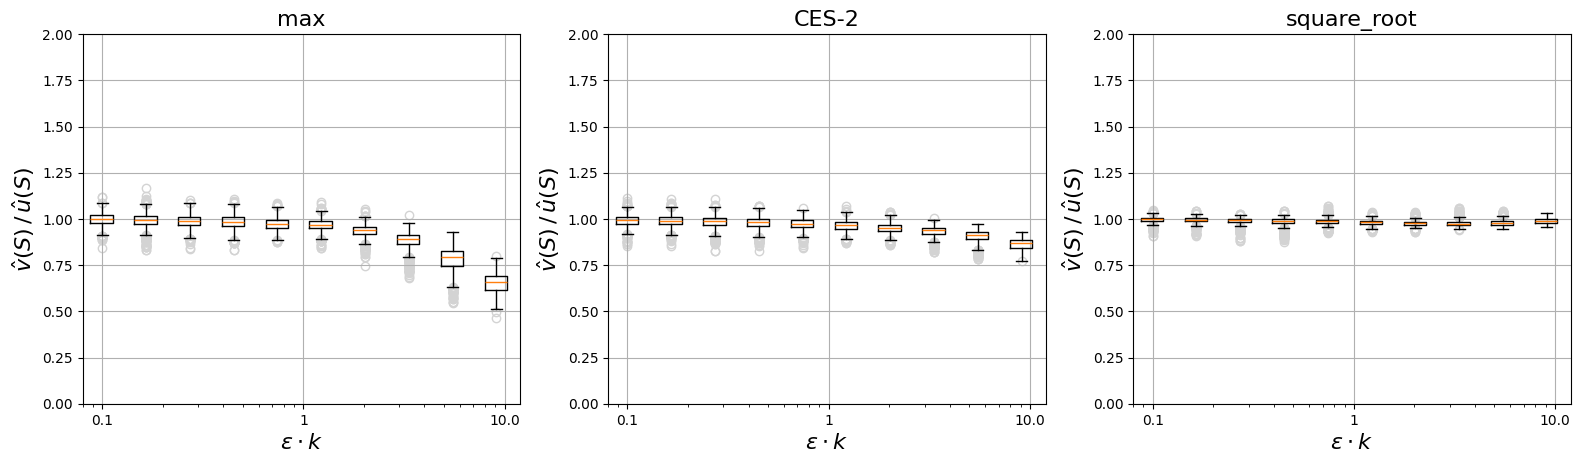

In [ ]:
df = pd.read_csv('./res_comp.csv')
box_plot_eps(df, 'Exponential', 1)

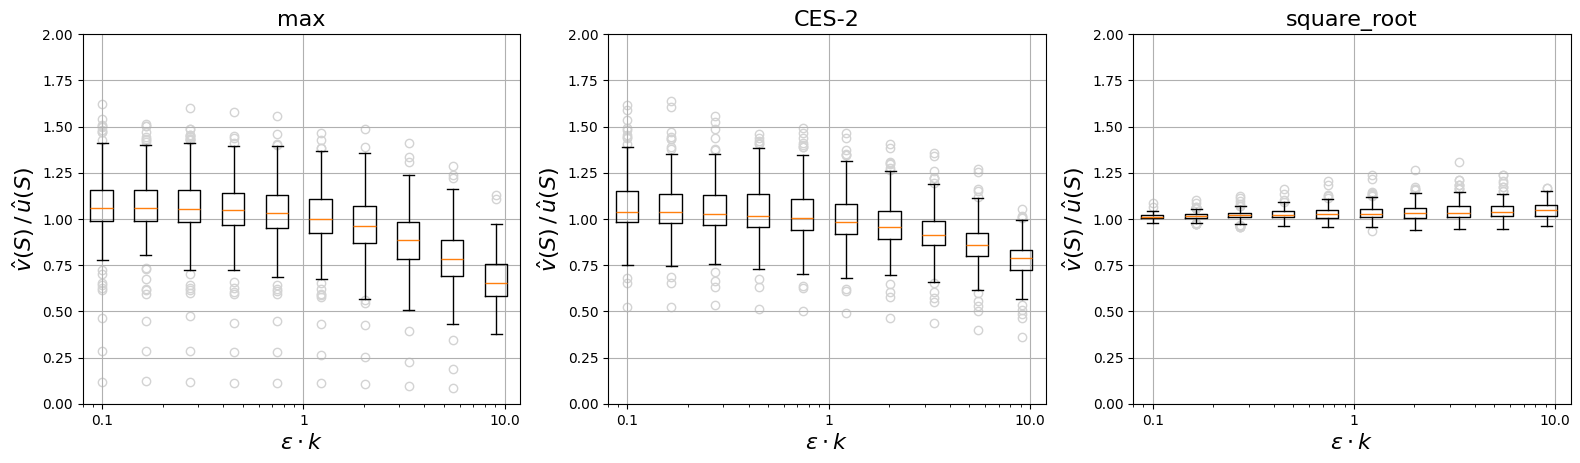

In [ ]:
df = pd.read_csv('./res_comp.csv')
box_plot_eps(df, 'Pareto-1.5', 1)

### Comparison with the test score sketch function (Figure 6)

In [ ]:
## Plotting utility for Figure 6
def bar_plot():
    df = pd.read_csv('./res_score.csv')

    for i, d in enumerate(distributions):
        fig, ax = plt.subplots(figsize = (6.4, 4.8))
        current = df[(df['distribution'] == d)]
        x_axis = np.arange(len(objs))

        # Calculate median and quantiles (25% and 75%)
        EB_stats = current.groupby(['obj'])['ratio_EB'].agg([
             ('median', 'median'),
             ('q25', lambda x: np.quantile(x, 0.25)),
             ('q75', lambda x: np.quantile(x, 0.75))
         ])

        TS_stats = current.groupby(['obj'])['ratio_TS'].agg([
             ('median', 'median'),
             ('q25', lambda x: np.quantile(x, 0.25)),
             ('q75', lambda x: np.quantile(x, 0.75))
         ])

        EB_lower_err = EB_stats['median'] - EB_stats['q25']  # distance from median to 25th percentile
        EB_upper_err = EB_stats['q75'] - EB_stats['median']  # distance from median to 75th percentile

        TS_lower_err = TS_stats['median'] - TS_stats['q25']  # distance from median to 25th percentile
        TS_upper_err = TS_stats['q75'] - TS_stats['median']  # distance from median to 75th percentile


        ax.bar(x_axis -0.15, TS_stats['median'], yerr=[TS_lower_err, TS_upper_err], capsize=5, width=0.3, label = 'Test Score', alpha= 0.5)
        ax.bar(x_axis +0.15, EB_stats['median'], yerr=[EB_lower_err, EB_upper_err], capsize=5, width=0.3, label = 'Our method', alpha= 0.5)
        # add legends
        ax.legend(fontsize=14,loc='upper left')
        ax.grid()
        # set xticks and labels
        ax.set_xticks(x_axis)
        ax.set_xticklabels(objs, fontsize= 15)
        ax.set_xlabel("objectives", fontsize= 15)
        ax.set_ylabel(r"$\hat{v}(S)\, /\, \hat{u}(S)$", fontsize= 15)
        ax.set_ylim((0, 2))

In [ ]:
create_output_comp()
c = 0.1
c = 0.99
for k in range(1,21):
    print(f"Now processing {k}")
    set_items = get_sets(n, k, n_sets)
    for obj in objs:
        run_comparison_TS(n, k, c/k, n_sample, 'Pareto-1.5', obj, n_sets, set_items)
        run_comparison_TS(n, k, c/k, n_sample, 'Exponential', obj, n_sets, set_items)

Now processing 1


/content/drive/MyDrive/Sketch-main/experiments/synthetic/exp.py:111: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_row], ignore_index=True)


Now processing 2
Now processing 3
Now processing 4
Now processing 5
Now processing 6
Now processing 7
Now processing 8
Now processing 9
Now processing 10
Now processing 11
Now processing 12
Now processing 13
Now processing 14
Now processing 15
Now processing 16
Now processing 17
Now processing 18
Now processing 19
Now processing 20


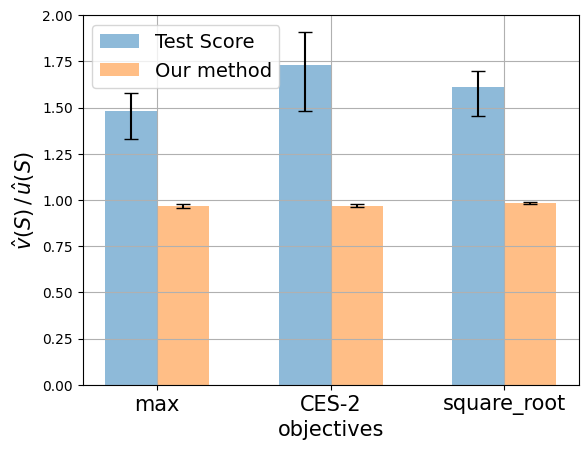

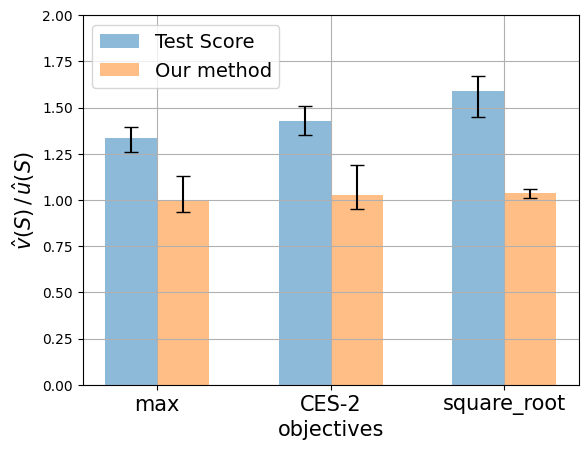

In [ ]:
bar_plot()

### Function approximation accuracy achieved by our sketch function (Figure 4)

In [ ]:
## Plotting utility for Figure 4
def box_plot(option):
    df = pd.read_csv('./res_score.csv')
    flierprops = dict(marker='o', markeredgecolor='lightgrey')
    df['obj'] = df['obj'].replace(['CES-2'], 'mb')
    for i, d in enumerate(distributions):
        fig, ax = plt.subplots(1, 1, figsize = (6.4, 4.8))
        current = df[(df['distribution'] == d)]
        current.boxplot(ax = ax, column = option, by = 'obj', flierprops = flierprops)
        ax.set_title('')
        ax.set_xlabel("objectives",fontsize= 15)
        ax.set_ylabel(r"$\hat{v}(S)\, /\, \hat{u}(S)$", fontsize= 15)
        ax.set_xticklabels(['max', 'CES-2', 'square_root'],fontsize= 15)
        ax.set_ylim((0, 2))
        fig.suptitle('')

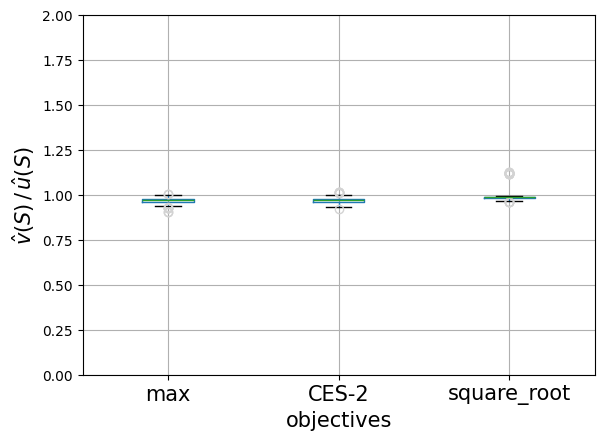

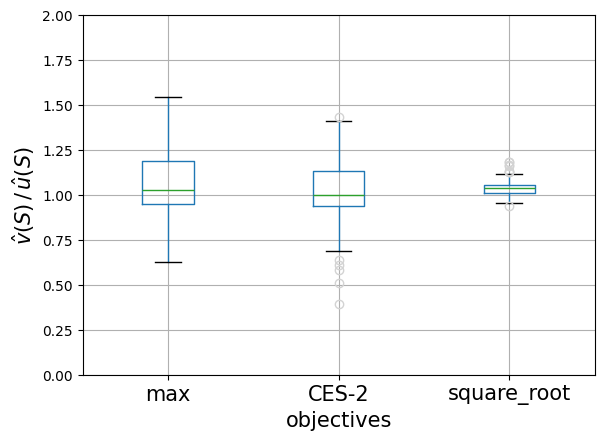

In [ ]:
box_plot('ratio_EB')